## Objective:
* Predict if an insurance claim is fraudulent or not.

**Steps:**
* Data Loading: Load the dataset from the provided URL.
* Data Preprocessing: Handle missing values, encode categorical features, and normalize the data.
* Model Training: Train classification models.
* Evaluation: Evaluate models using appropriate metrics.
* Visualization: Visualize feature importance, ROC curve, and confusion matrix.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset from the provided link
url = "https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Insurance%20Claim%20Fraud%20Detection/Automobile_insurance_fraud.csv"
df = pd.read_csv(url, na_values=['?'])

# Display the first few rows and inspect the dataset
df.head()

,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES.1,71610,6510,13020,52080,Saab,92x,2004,Y
0,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
1,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
2,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
3,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
4,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y


## Data Cleaning and Preprocessing

In [3]:
# Check the current column headers
print(df.columns)

Index(['328', '48', '521585', '17-10-2014', 'OH', '250/500', '1000', '1406.91',
       '0', '466132', 'MALE', 'MD', 'craft-repair', 'sleeping', 'husband',
       '53300', '0.1', '25-01-2015', 'Single Vehicle Collision',
       'Side Collision', 'Major Damage', 'Police', 'SC', 'Columbus',
       '9935 4th Drive', '5', '1', 'YES', '1.1', '2', 'YES.1', '71610', '6510',
       '13020', '52080', 'Saab', '92x', '2004', 'Y'],
      dtype='object')


In [4]:
# Correct column headers based on the provided description
column_headers = [
    "months_as_customer", "age", "policy_number", "policy_bind_date", "policy_state", 
    "policy_csl", "policy_deductible", "policy_annual_premium", "umbrella_limit", 
    "insured_zip", "insured_sex", "insured_education_level", "insured_occupation", 
    "insured_hobbies", "insured_relationship", "capital-gains", "capital-loss", 
    "incident_date", "incident_type", "collision_type", "incident_severity", 
    "authorities_contacted", "incident_state", "incident_city", "incident_location", 
    "incident_hour_of_the_day", "number_of_vehicles_involved", "property_damage", 
    "bodily_injuries", "witnesses", "police_report_available", "total_claim_amount", 
    "injury_claim", "property_claim", "vehicle_claim", "auto_make", "auto_model", 
    "auto_year", "fraud_reported"
]

In [5]:
# Assign corrected column headers to the dataframe
df.columns = column_headers

In [6]:
# Check the updated column headers
print(df.columns)

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductible',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')


In [7]:
df['incident_month'] = pd.to_datetime(df['incident_date']).dt.month

# Drop original date columns after extraction (assuming they exist)
if 'policy_bind_date' in df.columns and 'incident_date' in df.columns:
    df.drop(columns=['policy_bind_date', 'incident_date'], inplace=True)
else:
    print("Columns 'policy_bind_date' and/or 'incident_date' not found.")

In [8]:
# Verify the changes
df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductible,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,incident_month
0,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,1
1,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,2
2,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,10
3,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,2
4,256,39,104594,OH,250/500,1000,1351.10,0,478456,FEMALE,...,NO,64100,6410,6410,51280,Saab,95,2003,Y,2


In [9]:
# Check for null values
print(df.isnull().sum())

months_as_customer               0
age                              0
policy_number                    0
policy_state                     0
policy_csl                       0
policy_deductible                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_availa

In [10]:
# Check for missing values in specified columns
cols_with_missing = ['collision_type', 'property_damage', 'police_report_available']
missing_counts = df[cols_with_missing].isnull().sum()
print("Missing Value Counts:")
print(missing_counts)

# Example: Impute missing values for categorical columns with mode
for col in cols_with_missing:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)

# Example: Impute missing values for numerical columns with mean
# Replace 'object' with 'float64' or 'int64' depending on the data type of your columns
for col in cols_with_missing:
    if df[col].dtype in ['float64', 'int64']:
        df[col].fillna(df[col].mean(), inplace=True)

# Verify that all missing values are handled
print("Missing Value Counts after Imputation:")
print(df[cols_with_missing].isnull().sum())


Missing Value Counts:
collision_type             178
property_damage            360
police_report_available    343
dtype: int64
Missing Value Counts after Imputation:
collision_type             0
property_damage            0
police_report_available    0
dtype: int64


## Exploratory Data Analysis (EDA)

In [11]:
# Describe the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,999.0,2.038298e+02,1.151038e+02,0.00,115.500,199.00,276.00,479.00
age,999.0,3.893894e+01,9.140370e+00,19.00,32.000,38.00,44.00,64.00
policy_number,999.0,5.462633e+05,2.571906e+05,100804.00,335913.500,533940.00,759459.50,999435.00
policy_deductible,999.0,1.136136e+03,6.121560e+02,500.00,500.000,1000.00,2000.00,2000.00
policy_annual_premium,999.0,1.256255e+03,2.442432e+02,433.33,1089.185,1257.04,1415.71,2047.59
umbrella_limit,999.0,1.102102e+06,2.298293e+06,-1000000.00,0.000,0.00,0.00,10000000.00
insured_zip,999.0,5.012496e+05,7.172892e+04,430104.00,448373.000,466498.00,603254.00,620962.00
capital-gains,999.0,2.509790e+04,2.787187e+04,0.00,0.000,0.00,51000.00,100500.00
capital-loss,999.0,-2.682052e+04,2.810537e+04,-111100.00,-51500.000,-24100.00,0.00,0.00
incident_hour_of_the_day,999.0,1.165065e+01,6.951671e+00,0.00,6.000,12.00,17.00,23.00


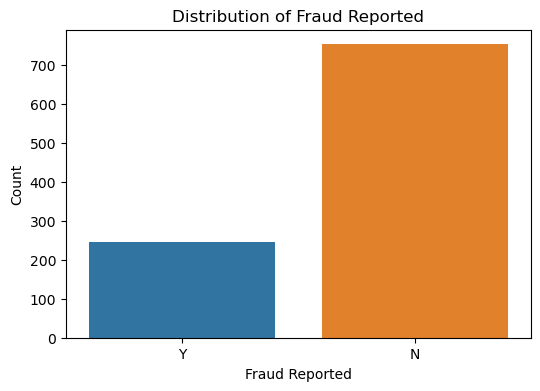

In [12]:
# Distribution of target variable (fraud_reported)
plt.figure(figsize=(6, 4))
sns.countplot(x='fraud_reported', data=df)
plt.title('Distribution of Fraud Reported')
plt.xlabel('Fraud Reported')
plt.ylabel('Count')
plt.show()

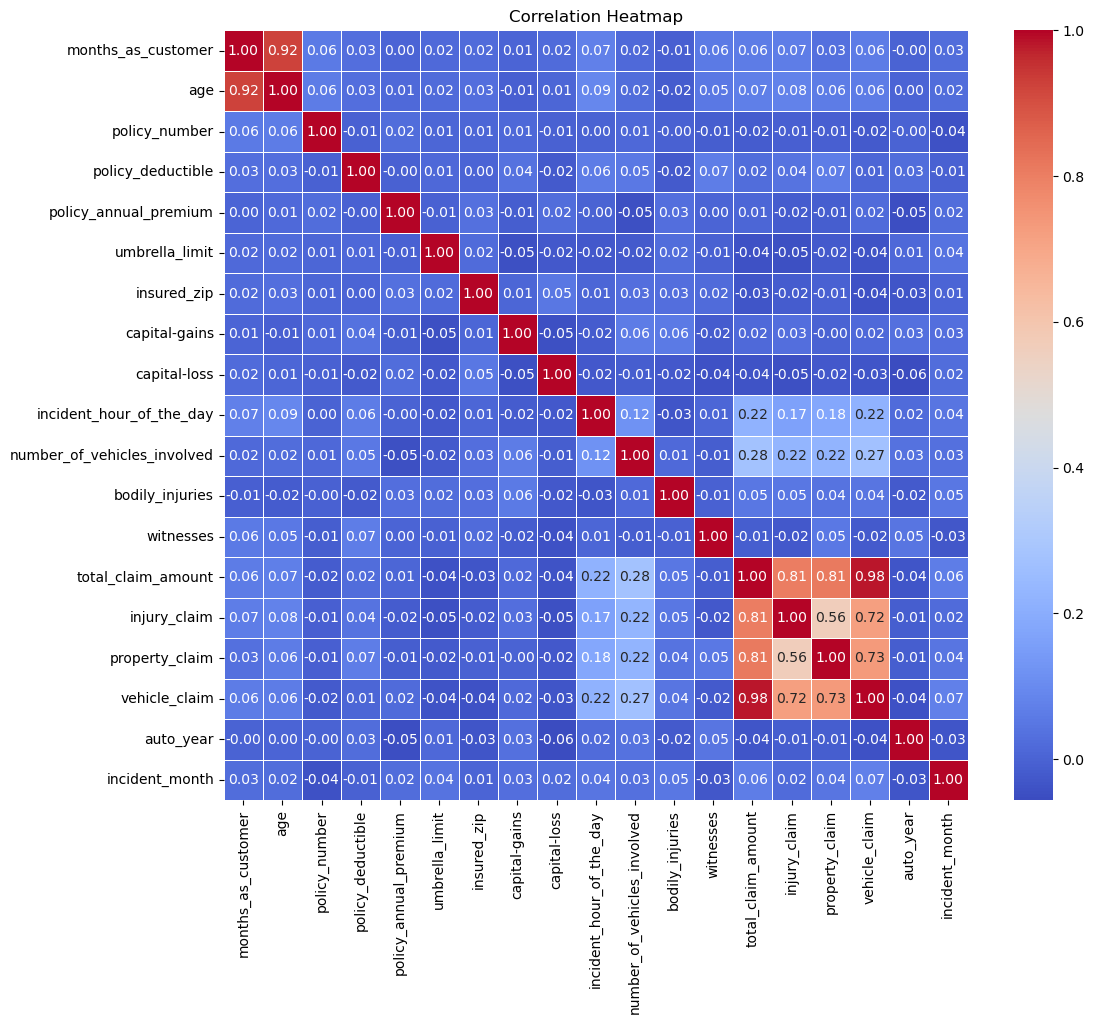

In [13]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


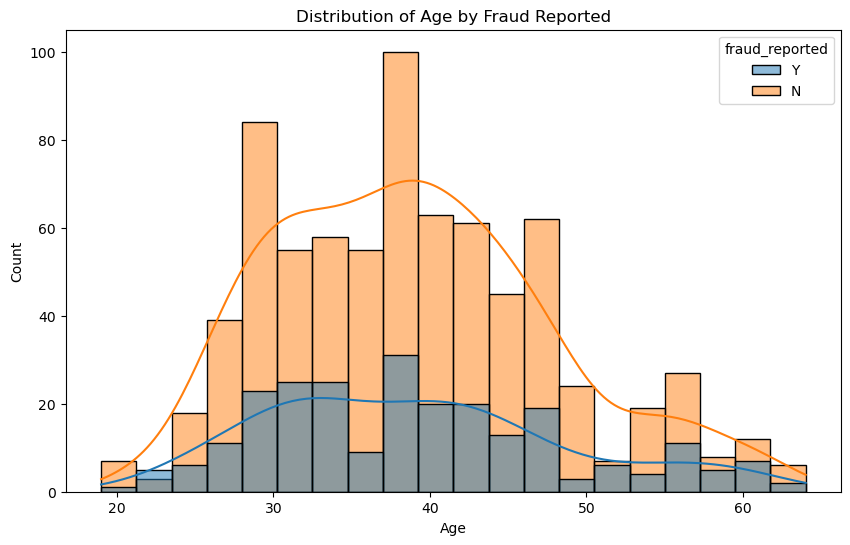

In [14]:
# Example: Distribution of age by fraud reported
plt.figure(figsize=(10, 6))
sns.histplot(x='age', data=df, hue='fraud_reported', kde=True, bins=20)
plt.title('Distribution of Age by Fraud Reported')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## Model Building and Evaluation

Classification Report:
              precision    recall  f1-score   support

           N       0.84      0.90      0.87       153
           Y       0.57      0.45      0.50        47

    accuracy                           0.79       200
   macro avg       0.70      0.67      0.68       200
weighted avg       0.78      0.79      0.78       200



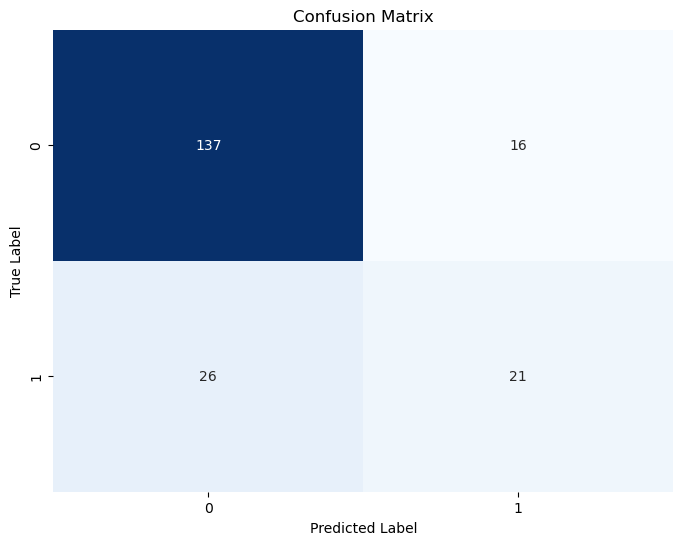

In [19]:
# Drop 'incident_location' column if it contains non-numeric data causing issues
if 'incident_location' in df.columns:
    df.drop(columns=['incident_location'], inplace=True)

# Define features and target variable
X = df.drop(columns=['fraud_reported'])
y = df['fraud_reported']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Predict on test set
y_pred = rf_clf.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

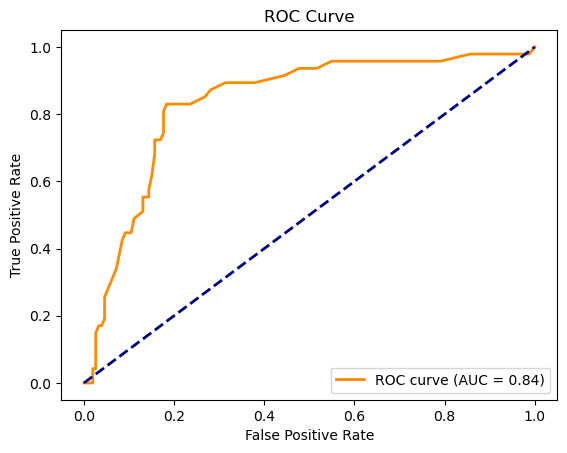

In [21]:
# Example: Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()
categorical_cols = ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
                    'insured_occupation', 'insured_hobbies', 'insured_relationship',
                    'incident_type', 'collision_type', 'incident_severity',
                    'authorities_contacted', 'incident_state', 'incident_city',
                    'property_damage', 'police_report_available', 'auto_make', 'auto_model']

for col in categorical_cols:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col])

# Define features and target variable
X = df.drop(columns=['fraud_reported'])
y = df['fraud_reported']

# Fit LabelEncoder on target variable (assuming 'N' is 0 and 'Y' is 1)
label_encoder.fit(y)
y_binary = label_encoder.transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Predict probabilities on test set
y_probs = rf_clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs, pos_label=1)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**Insurance Fraud Detection Project**

* Insurance fraud is a significant issue affecting the industry, leading to financial losses and increased premiums for honest policyholders. Machine learning offers a promising approach to detect fraudulent insurance claims early, thereby minimizing losses and ensuring fair premiums.

**Dataset Overview**

* The dataset used for this project contains detailed information about insurance policies, customer demographics, accident details, and whether a claim is fraudulent (fraud_reported). Features include policy details, accident specifics, and customer attributes.

**Model Development and Evaluation**

* A Random Forest Classifier was chosen for its ability to handle complex relationships in data and provide robust predictions. Here’s a summary of the model performance based on the provided classification report:

**Precision and Recall:**

* Precision for detecting fraudulent claims ('Y') is 0.57, indicating that when the model predicts fraud, it is correct 57% of the time.
* Recall for fraudulent claims ('Y') is 0.45, meaning that the model correctly identifies 45% of all actual fraudulent claims.

**F1-score:**

* The F1-score for fraudulent claims ('Y') is 0.50, which balances precision and recall, providing a measure of model accuracy in detecting fraud.
Accuracy:

* The overall accuracy of the model is 0.79, indicating that it correctly predicts 79% of all claims (both fraudulent and non-fraudulent).

## Conclusion

* While the model shows promising performance with an accuracy of 79%, there are areas for improvement, particularly in increasing the recall for fraudulent claims. Enhancing the model’s ability to identify more fraudulent claims (higher recall) without compromising precision is crucial for effectively combating insurance fraud.